# **Cardiovascular Disease prediction: Data Preprocessing, EDA, Visualization, Prediction and Result Comparison**

**Group: 02**


# Importing the required libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, jaccard_similarity_score
import pandas_profiling as pp

# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier



# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Downloading the dataset <a class="anchor" id="2"></a>

### Description:
There are 3 types of input features:


*   Objective: factual information
*   Examination: results of medical 
*   Subjective: information given by the patient
---
**Features:**
1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [ ]:
data = pd.read_csv("cardio_train.csv", sep=";")

# **Data Preprocessing**

In [ ]:
# shape of dataset
data.shape

(70000, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Handling Missing values

In [ ]:
# handling missing values
print("Missing Values")
data.isnull().sum()

Missing Values


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## Handling Duplicate values

In [ ]:
# to handle duplicate values
print("Duplicate values: ")
print(data.duplicated().sum())

data.drop_duplicates(inplace=True)

data.shape

Duplicate values: 
0


(70000, 13)

In [ ]:
data.drop("id",axis=1,inplace=True)

## Adding a new feature column- BMI

In [ ]:
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
len(data)

69007

In [ ]:
out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~out_filter2]
data.shape

(68999, 13)

In [ ]:
data.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68999 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68999 non-null  int64  
 1   gender       68999 non-null  int64  
 2   height       68999 non-null  int64  
 3   weight       68999 non-null  float64
 4   ap_hi        68999 non-null  int64  
 5   ap_lo        68999 non-null  int64  
 6   cholesterol  68999 non-null  int64  
 7   gluc         68999 non-null  int64  
 8   smoke        68999 non-null  int64  
 9   alco         68999 non-null  int64  
 10  active       68999 non-null  int64  
 11  cardio       68999 non-null  int64  
 12  bmi          68999 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


# **Data** **Visualization**

### Patients Count vs Cardio

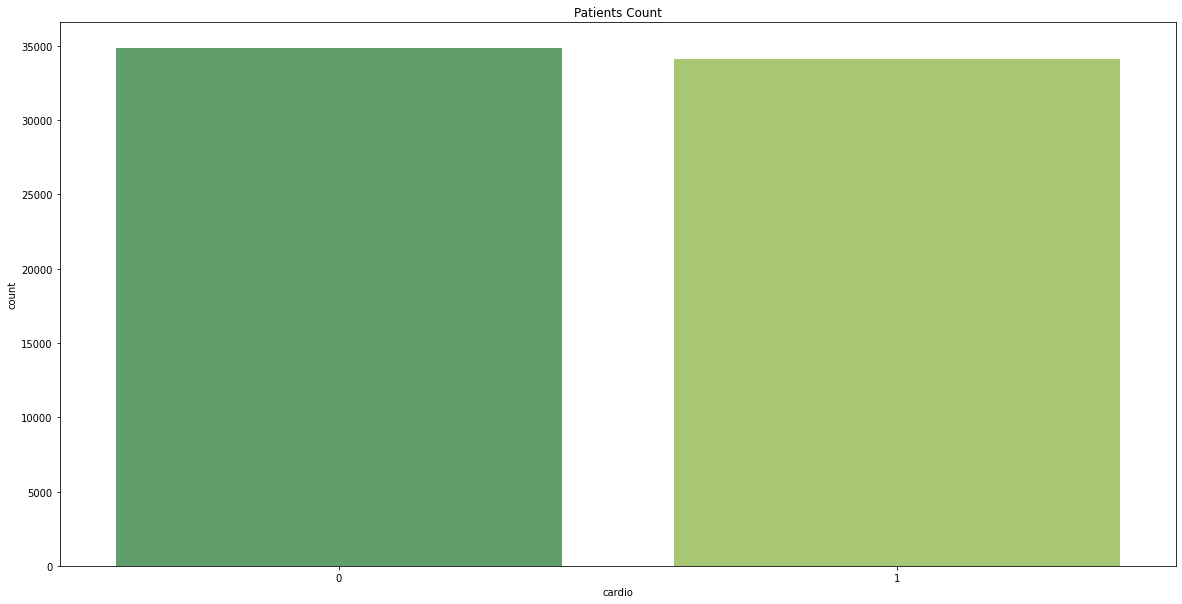

In [ ]:
# Using seaborn library
plt.figure(figsize=(20, 10))
plt.xlabel('patients')
plt.ylabel("Count")
plt.title("Patients Count")
sns.countplot(x='cardio', palette='summer', data=data, order = data['cardio'].value_counts().index)

### CVD frequncy for genders

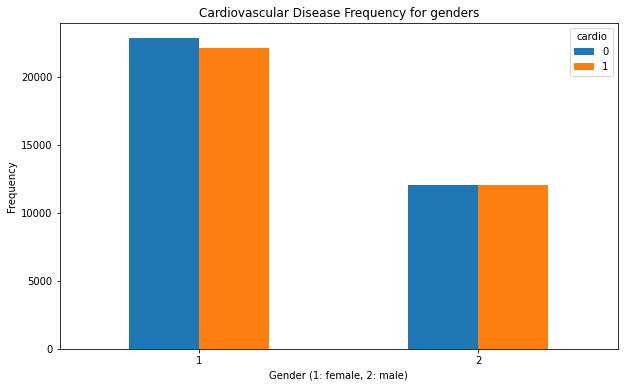

In [ ]:
# Using Pandas library
pd.crosstab(data.gender, data.cardio, normalize=False).plot(kind="bar", figsize=(10, 6))
plt.title('Cardiovascular Disease Frequency for genders')
plt.xlabel('Gender (1: female, 2: male)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.savefig('1.png')
plt.show()

### At what age does the number of people with CVD exceed the number of people without CVD?

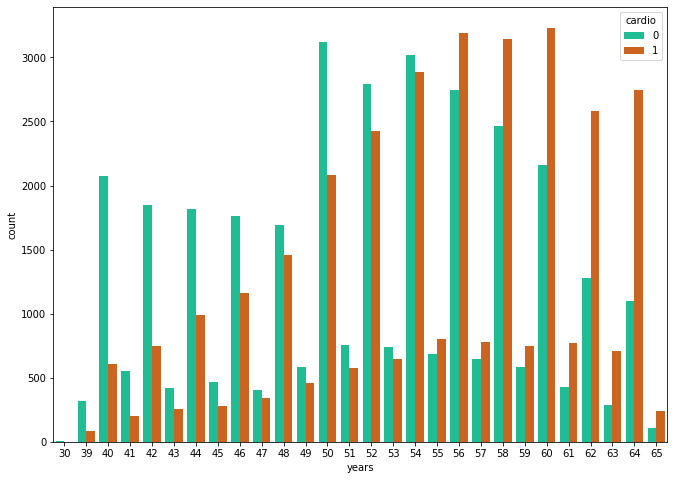

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
data['years'] = (data['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = data, palette=['#06d6a0',"#e85d04"]);

**Graph shows that people over 55 of age are more exposed to CVD.**

### Heat Map [Correlation matrix] for Multivariate analysis

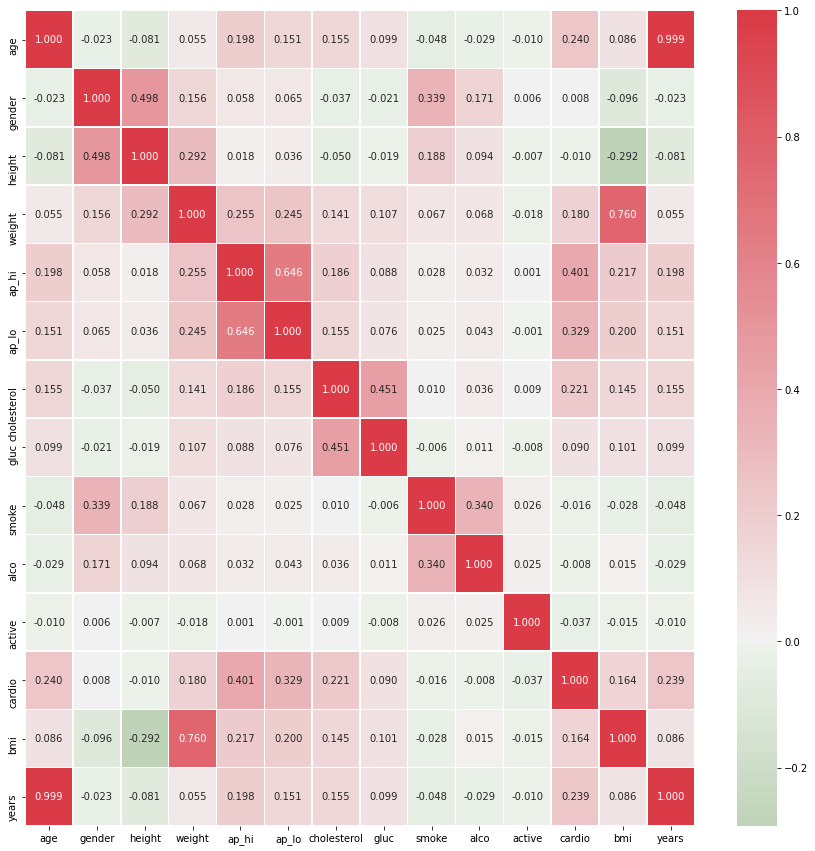

In [ ]:
corr = data.corr()

cmap = sns.diverging_palette(120, 10, as_cmap=True)
# mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15,15))

# mask=mask
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".3f", center=0, linewidths=0.5, ax=ax)

### Box Plot using BMI

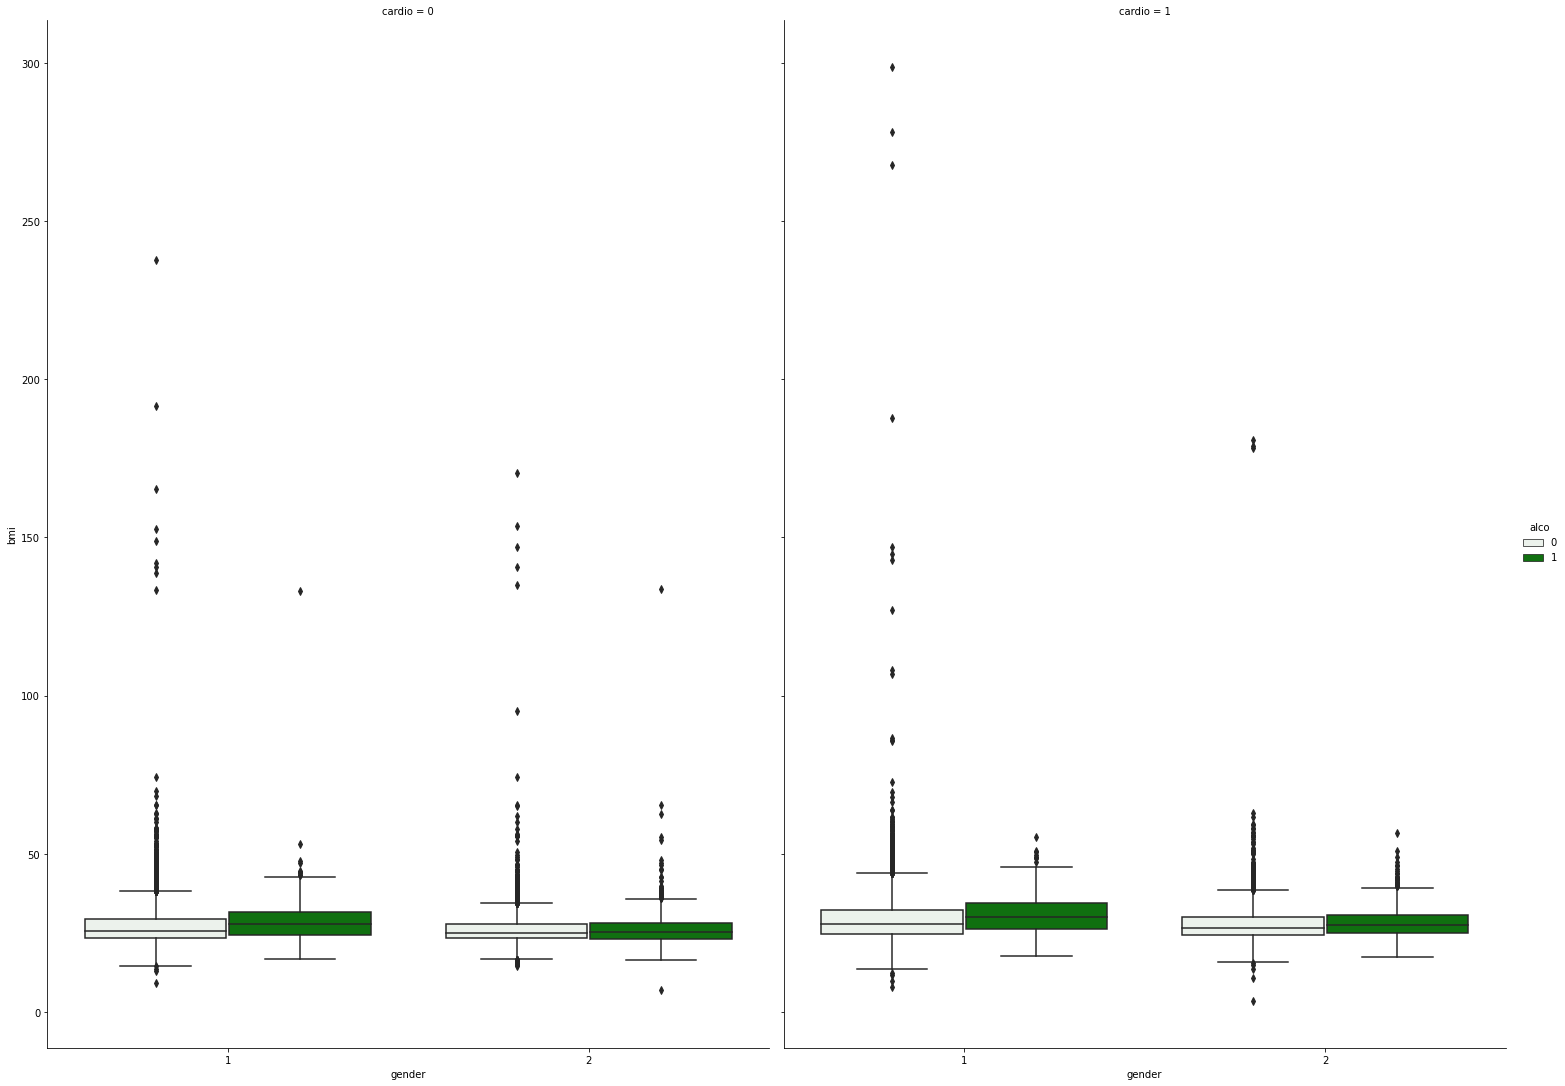

In [ ]:
sns.catplot(x="gender", y="bmi", hue="alco", col="cardio", data=data, color = "green",kind="box", height=15, aspect=.7);

**The box plot shows that drinking women have higher risks for CVD than drinking men based on thier BMI.**

### Multiple Plots

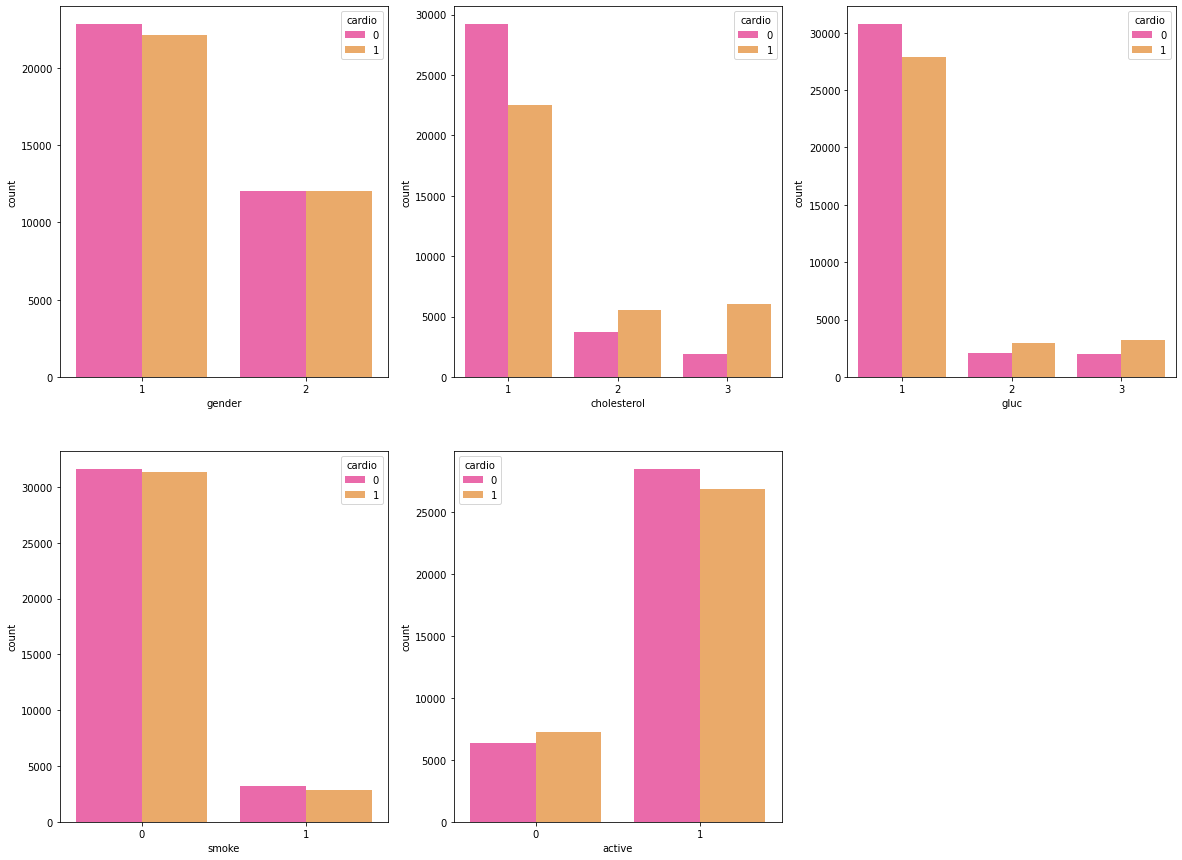

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20,15))
fig.delaxes(axes[1][2])
for counter, index in enumerate(['gender', 'cholesterol', 'gluc', 'smoke', 'active']):
    sns.countplot(x=index, hue='cardio', palette="spring", data=data[[index, 'cardio']], ax=axes[counter//3, counter%3])

# **Data Preparation for Modeling** <a class="anchor" id="4"></a>


Spliting  data on 20% in the test dataset, the remaining 80% - in the training dataset

In [ ]:
X = data[['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']].values
y = data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Tuning models and testing for all features** <a class="anchor" id="5"></a>

There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- K-Nearest Neighbors
- Naive Bayes Classifier
- Decision Tree Classifier
- XGB Classifier


## 1. Logistic Regression <a class="anchor" id="5.1"></a>


Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. 


In [ ]:
# import model and fit to data
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# prediction on test data
pred_test_log = logmodel.predict(X_test)
pred_log = logmodel.predict(X_train)

In [ ]:
# to print the classification report
print(classification_report(y_test,pred_test_log))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      6984
           1       0.63      0.59      0.61      6816

    accuracy                           0.63     13800
   macro avg       0.63      0.63      0.63     13800
weighted avg       0.63      0.63      0.63     13800



In [ ]:
# printing the results
acc_log = metrics.accuracy_score(y_train,pred_log ) * 100
acc_test_log = metrics.accuracy_score(y_test, pred_test_log) * 100
print("Accuracy train : ", acc_log)
print("Accuracy test : ", acc_test_log)

Accuracy train :  62.77649957426765
Accuracy test :  62.9927536231884


## 2. Decision Tree Classifier <a class="anchor" id="5.7"></a>

This model uses a **Decision Tree** as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. 

In [ ]:
# import model and fit to data
DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DecTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# predicting results on dataset
pred_decision_tree = DecTree.predict(X_train)
pred_test_decision_tree = DecTree.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_test_decision_tree))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      6984
           1       0.73      0.71      0.72      6816

    accuracy                           0.73     13800
   macro avg       0.73      0.73      0.73     13800
weighted avg       0.73      0.73      0.73     13800



In [ ]:
acc_decision_tree = metrics.accuracy_score(y_train, pred_decision_tree) * 100
acc_test_decision_tree = metrics.accuracy_score(y_test, pred_test_decision_tree) * 100

print("Accuracy train : ", acc_decision_tree)
print("Accuracy test : ", acc_test_decision_tree)

Accuracy train :  72.81110165039222
Accuracy test :  72.63768115942028


In [ ]:
# Plotting Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5151 1833]
 [1943 4873]]


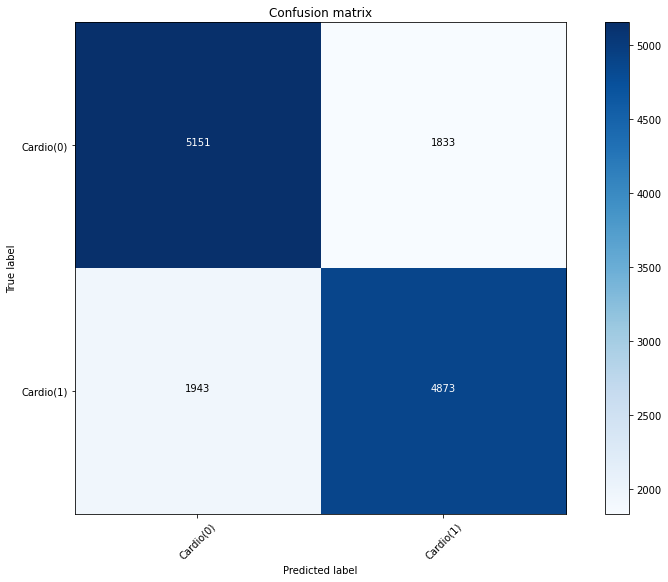

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_test_decision_tree, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Cardio(0)','Cardio(1)'],normalize= False, title='Confusion matrix')

## 3. Naive Bayes

**Naive Bayes classifiers** are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

In [ ]:
#Training
model = GaussianNB()
model.fit(X_train, y_train)

#Prediction
pred_gaussian = model.predict(X_train)
pred_test_gaussian = model.predict(X_test)

In [ ]:
acc_gaussian = accuracy_score(y_train, pred_gaussian) * 100
acc_test_gaussian = accuracy_score(y_test, pred_test_gaussian) * 100

print("Accuracy train : ", acc_gaussian)
print("Accuracy test : ", acc_test_gaussian)

Accuracy train :  70.79113752060726
Accuracy test :  70.3768115942029


In [ ]:
print(classification_report(y_test,pred_test_gaussian))

              precision    recall  f1-score   support

           0       0.67      0.81      0.74      6984
           1       0.76      0.59      0.66      6816

    accuracy                           0.70     13800
   macro avg       0.71      0.70      0.70     13800
weighted avg       0.71      0.70      0.70     13800



## 4. K-Nearest Neighbors algorithm <a class="anchor" id="5.4"></a>

**K-Nearest Neighbors algorithm** is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small).

In [ ]:
k = 31
#Training and Predicting  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
pred_knn = neigh.predict(X_train)
pred_test_knn = neigh.predict(X_test)
pred_test_knn[0:5]

array([0, 0, 0, 0, 1])

In [ ]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    pred_test_knn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, pred_test_knn)

    
    std_acc[n-1]=np.std(pred_test_knn==y_test)/np.sqrt(pred_test_knn.shape[0])

mean_acc

array([0.63, 0.64, 0.67, 0.67, 0.69, 0.69, 0.7 , 0.7 , 0.7 , 0.7 , 0.71,
       0.7 , 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.71, 0.71, 0.71])

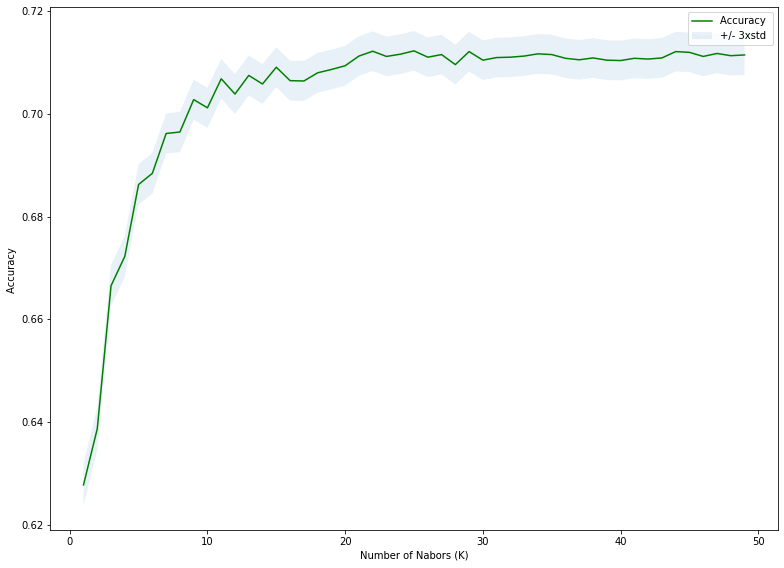

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7122463768115942 with k= 25


In [ ]:
acc_knn = accuracy_score(y_train, pred_knn) * 100
acc_test_knn = accuracy_score(y_test, pred_test_knn) * 100
print("Accuracy train : ", acc_knn)
print("Accuracy test : ", acc_test_knn)

Accuracy train :  72.84552256381455
Accuracy test :  71.14492753623189


In [ ]:
print(classification_report(y_test,pred_test_knn))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73      6984
           1       0.75      0.63      0.68      6816

    accuracy                           0.71     13800
   macro avg       0.72      0.71      0.71     13800
weighted avg       0.72      0.71      0.71     13800



## 5. XGB Classifier Model

In [ ]:
def hyperopt_xgb_score(params):
    clf = XGBClassifier(**params)
    current_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_xgb = {
            'learning_rate': hp.quniform('learning_rate', 0, 0.05, 0.0001),
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'eta': hp.quniform('eta', 0.025, 0.5, 0.005),
            'max_depth':  hp.choice('max_depth', np.arange(2, 12, dtype=int)),
            'min_child_weight': hp.quniform('min_child_weight', 1, 9, 0.025),
            'subsample': hp.quniform('subsample', 0.5, 1, 0.005),
            'gamma': hp.quniform('gamma', 0.5, 1, 0.005),
            'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.005),
            'eval_metric': 'auc',
            'objective': 'binary:logistic',
            'booster': 'gbtree',
            'tree_method': 'exact',
            'silent': 1,
            'missing': None
        }
 
best = fmin(fn=hyperopt_xgb_score, space=space_xgb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.7354120416689643
{'booster': 'gbtree', 'colsample_bytree': 0.96, 'eta': 0.075, 'eval_metric': 'auc', 'gamma': 0.935, 'learning_rate': 0.019, 'max_depth': 5, 'min_child_weight': 3.45, 'missing': None, 'n_estimators': 499, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.91, 'tree_method': 'exact'}
0.7353214685237559
{'booster': 'gbtree', 'colsample_bytree': 0.68, 'eta': 0.41500000000000004, 'eval_metric': 'auc', 'gamma': 0.9450000000000001, 'learning_rate': 0.0287, 'max_depth': 6, 'min_child_weight': 2.1, 'missing': None, 'n_estimators': 358, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.97, 'tree_method': 'exact'}
0.7358468636672785
{'booster': 'gbtree', 'colsample_bytree': 0.965, 'eta': 0.20500000000000002, 'eval_metric': 'auc', 'gamma': 0.785, 'learning_rate': 0.0134, 'max_depth': 5, 'min_child_weight': 1.375, 'missing': None, 'n_estimators': 821, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.86, 'tree_method': 'exact'}
0.7355569527928553
{'bo

In [ ]:
params = space_eval(space_xgb, best)
params

{'booster': 'gbtree',
 'colsample_bytree': 0.54,
 'eta': 0.045,
 'eval_metric': 'auc',
 'gamma': 0.855,
 'learning_rate': 0.0033,
 'max_depth': 5,
 'min_child_weight': 3.6750000000000003,
 'missing': None,
 'n_estimators': 240,
 'objective': 'binary:logistic',
 'silent': 1,
 'subsample': 0.525,
 'tree_method': 'exact'}

In [ ]:
XGB_Classifier = XGBClassifier(**params)
XGB_Classifier.fit(X_train, y_train)

pred_xgb = XGB_Classifier.predict(X_train)
pred_test_xgb = XGB_Classifier.predict(X_test)


In [ ]:
print(classification_report(y_test,pred_test_xgb))
acc_xgb = metrics.accuracy_score(y_train, pred_xgb) * 100
acc_test_xgb = metrics.accuracy_score(y_test, pred_test_xgb) * 100

print("Accuracy train : ", acc_xgb)
print("Accuracy test : ", acc_test_xgb)

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6984
           1       0.76      0.66      0.71      6816

    accuracy                           0.73     13800
   macro avg       0.73      0.73      0.73     13800
weighted avg       0.73      0.73      0.73     13800

Accuracy train :  73.5429989673726
Accuracy test :  72.97101449275362


### **Feature Importance using xgb**

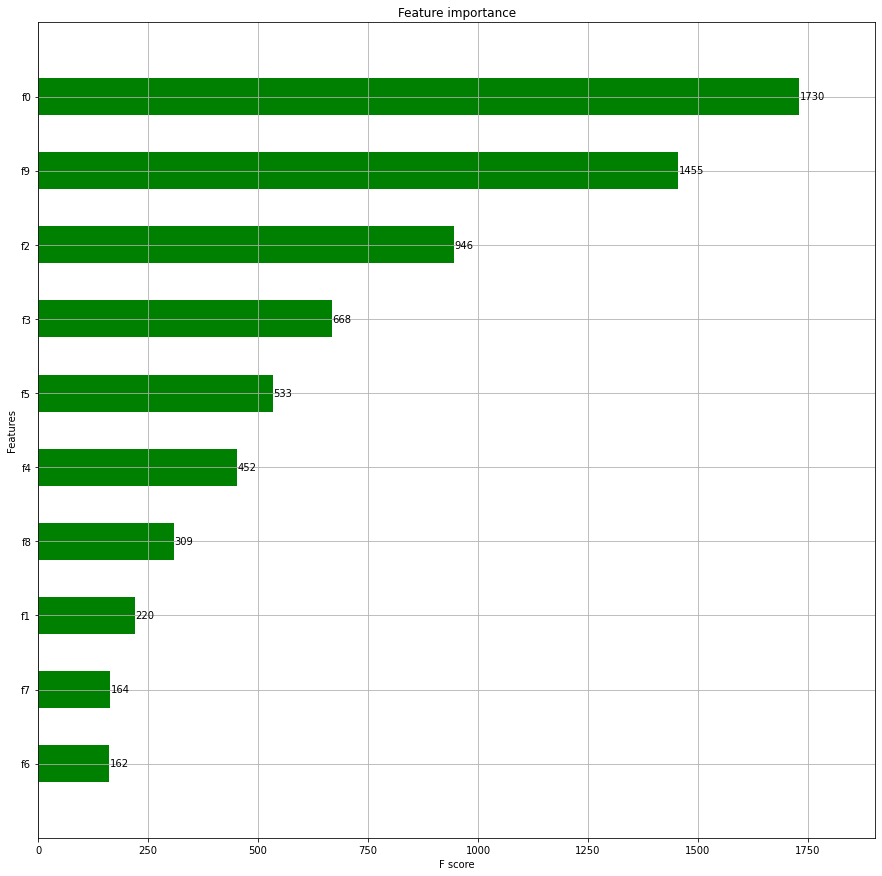

In [ ]:
 fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(XGB_Classifier, ax = axes, height =0.5, color="green")
plt.show();
plt.close()

# **Models evaluation** <a class="anchor" id="6"></a>

In [ ]:

models = pd.DataFrame({
       'Model': ['Logistic Regression', 'k-Nearest Neighbors', 'Naive Bayes', 
              'Decision Tree Classifier', 'XGBClassifier'],
    
    'Score_train': [acc_log, acc_knn, acc_gaussian, acc_decision_tree, 
                    acc_xgb],

    'Score_test': [acc_test_log, acc_test_knn, acc_test_gaussian, 
                   acc_test_decision_tree, acc_test_xgb]
                    })

In [ ]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
4,XGBClassifier,73.542999,72.971014
1,k-Nearest Neighbors,72.845523,71.144928
3,Decision Tree Classifier,72.811102,72.637681
2,Naive Bayes,70.791138,70.376812
0,Logistic Regression,62.776500,62.992754


In [ ]:
models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

,Model,Score_train,Score_test
4,XGBClassifier,73.542999,72.971014
3,Decision Tree Classifier,72.811102,72.637681
1,k-Nearest Neighbors,72.845523,71.144928
2,Naive Bayes,70.791138,70.376812
0,Logistic Regression,62.776500,62.992754


In [ ]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Score_diff
3,Decision Tree Classifier,72.811102,72.637681,0.173420
0,Logistic Regression,62.776500,62.992754,0.216254
2,Naive Bayes,70.791138,70.376812,0.414326
4,XGBClassifier,73.542999,72.971014,0.571984
1,k-Nearest Neighbors,72.845523,71.144928,1.700595


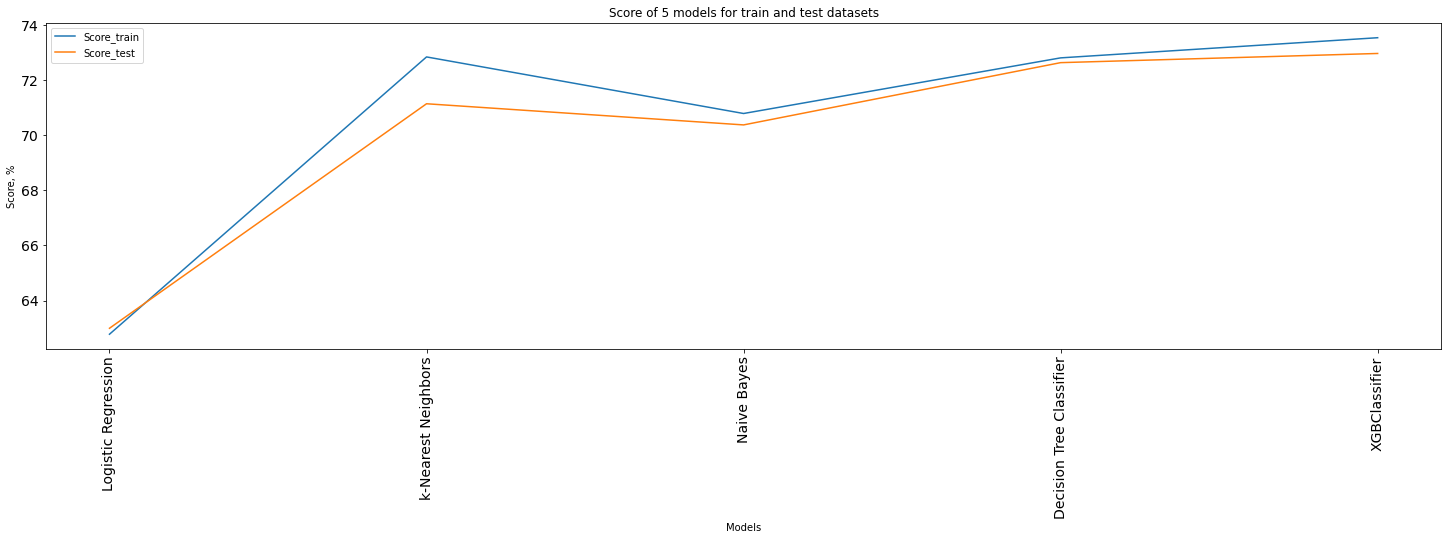

In [ ]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 5 models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()